In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# import investment to track performance during 2020
portfolio = pd.read_excel('portfolioBacktest.xlsx')

portfolio

,Unnamed: 0,SharpeRatio,MinVaR,SortinoRatio,Sharpe,Benchmark,ComponentVaR
0,AAPL,0.0000,0.0043,0.067989,0.069385,0.04,0.045973
1,ADBE,0.1340,0.0029,0.106483,0.107081,0.04,0.109495
2,AMD,0.1124,0.0001,0.109923,0.122687,0.04,0.143737
3,AMZN,0.1500,0.0014,0.127529,0.121341,0.04,0.140599
4,BA,0.0874,0.0003,0.061965,0.067033,0.04,0.042908
5,BABA,0.0000,0.0650,0.000000,0.000000,0.04,0.000000
6,BAC,0.0000,0.0021,0.000000,0.000000,0.04,0.000000
7,C,0.0000,0.1380,0.000000,0.000000,0.04,0.000000
8,CMCSA,0.0000,0.0532,0.000000,0.000000,0.04,0.000000
9,CSCO,0.0000,0.0548,0.000000,0.000000,0.04,0.000000


In [3]:
# Remove 0's of ComponentVaR, for better visualization
portfolio = portfolio[portfolio.ComponentVaR!=0].dropna()
portfolio

,Unnamed: 0,SharpeRatio,MinVaR,SortinoRatio,Sharpe,Benchmark,ComponentVaR
0,AAPL,0.0000,0.0043,0.067989,0.069385,0.04,0.045973
1,ADBE,0.1340,0.0029,0.106483,0.107081,0.04,0.109495
2,AMD,0.1124,0.0001,0.109923,0.122687,0.04,0.143737
3,AMZN,0.1500,0.0014,0.127529,0.121341,0.04,0.140599
4,BA,0.0874,0.0003,0.061965,0.067033,0.04,0.042908
15,MA,0.0415,0.0028,0.108071,0.098558,0.04,0.092757
16,MSFT,0.0547,0.0022,0.112323,0.097381,0.04,0.090556
17,NFLX,0.0927,0.0027,0.092824,0.101962,0.04,0.099276
18,NVDA,0.1500,0.0002,0.124430,0.135191,0.04,0.174526
22,V,0.0000,0.0039,0.088463,0.079381,0.04,0.060173


In [19]:
weights = portfolio['ComponentVaR'].values
print(weights)

[0.04597268 0.10949534 0.1437367  0.14059917 0.04290822 0.09275743
 0.09055592 0.09927598 0.17452584 0.06017271]


In [4]:
# Set Initial quantity to simulate first Buy-&-Hold Strategy, with nominal fixed
# Capital requested to allocate investment
initial_capital = float(input("How much will you invest? "))

How much will you invest? 1000000


In [5]:
# Cartera CVaR
stocks = list(portfolio.iloc[:,0].values)

start, end = dt.date(2019,12,25), dt.date(2019,12,31)
df =yahoo.download(stocks,start,end)["Adj Close"].fillna(method="ffill")
cvarport = pd.DataFrame(index=portfolio.iloc[:,0].values)
cvarport['capital'] = initial_capital # en miles
cvarport['price'] = df.tail(1).T.values
cvarport['weights'] = (portfolio['ComponentVaR'].values).round(2)
cvarport['cash'] = (cvarport['capital'] * cvarport['weights'])
cvarport['nominal'] =  cvarport['cash'] // cvarport['price'] 
cvarport['invested'] = cvarport['price'] * cvarport['nominal']
cvarport['percentage'] = cvarport['invested'] / sum(cvarport['invested'])
cvarport['total'] = sum(cvarport['invested'])
cvarport['liquido'] = cvarport['capital'] - cvarport['total']
#cvarport = cvarport[cvarport!=0].dropna()
cvarport


[*********************100%***********************]  10 of 10 completed


,capital,price,weights,cash,nominal,invested,percentage,total,liquido
AAPL,1000000.0,72.255997,0.05,50000.0,691.0,49928.893723,0.050545,987812.566029,12187.433971
ADBE,1000000.0,328.339996,0.11,110000.0,335.0,109993.898773,0.111351,987812.566029,12187.433971
AMD,1000000.0,45.520000,0.14,140000.0,3075.0,139974.001408,0.141701,987812.566029,12187.433971
AMZN,1000000.0,1846.890015,0.14,140000.0,75.0,138516.751099,0.140226,987812.566029,12187.433971
BA,1000000.0,324.469513,0.04,40000.0,123.0,39909.750092,0.040402,987812.566029,12187.433971
MA,1000000.0,295.748596,0.09,90000.0,304.0,89907.573242,0.091017,987812.566029,12187.433971
MSFT,1000000.0,155.938049,0.09,90000.0,577.0,89976.254456,0.091086,987812.566029,12187.433971
NFLX,1000000.0,323.309998,0.10,100000.0,309.0,99902.789246,0.101135,987812.566029,12187.433971
NVDA,1000000.0,231.937271,0.17,170000.0,732.0,169778.082458,0.171873,987812.566029,12187.433971
V,1000000.0,186.680908,0.06,60000.0,321.0,59924.571533,0.060664,987812.566029,12187.433971


# Rebalance Monthly

In [22]:
enero, febrero = dt.date(2020,1,1), dt.date(2020,2,1)
stocks = list(cvarport.index)
data = yahoo.download(stocks,enero,febrero)['Adj Close'].fillna(method="ffill")

[*********************100%***********************]  10 of 10 completed


In [23]:
cartera = pd.DataFrame(index=cvarport.index)
cartera['CantidadNominal'] = cvarport['nominal'].values
cartera['PrecioEntrada'] = cvarport['price'].values
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']
cartera['NuevoNominal'] = (cartera['Porcentaje'] * cartera['NocionalHoy']) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']
# borramos filas con 0 para acotar el excel
cartera = cartera[cartera!=0].dropna()
cartera


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,691.0,72.255997,0.050545,987812.566029,76.714989,1.040360e+06,1.053196,1.061711,685.0,-6.0,0.050636,1.037792e+06,2568.228256
ADBE,335.0,328.339996,0.111351,987812.566029,351.140015,1.040360e+06,1.053196,1.069440,329.0,-6.0,0.111318,1.037792e+06,2568.228256
AMD,3075.0,45.520000,0.141701,987812.566029,47.000000,1.040360e+06,1.053196,1.032513,3136.0,61.0,0.142025,1.037792e+06,2568.228256
AMZN,75.0,1846.890015,0.140226,987812.566029,2008.719971,1.040360e+06,1.053196,1.087623,72.0,-3.0,0.139361,1.037792e+06,2568.228256
BA,123.0,324.469513,0.040402,987812.566029,316.387573,1.040360e+06,1.053196,0.975092,132.0,9.0,0.040242,1.037792e+06,2568.228256
MA,304.0,295.748596,0.091017,987812.566029,314.266693,1.040360e+06,1.053196,1.062614,301.0,-3.0,0.091150,1.037792e+06,2568.228256
MSFT,577.0,155.938049,0.091086,987812.566029,168.445557,1.040360e+06,1.053196,1.080208,562.0,-15.0,0.091219,1.037792e+06,2568.228256
NFLX,309.0,323.309998,0.101135,987812.566029,345.089996,1.040360e+06,1.053196,1.067366,304.0,-5.0,0.101087,1.037792e+06,2568.228256
NVDA,732.0,231.937271,0.171873,987812.566029,236.040497,1.040360e+06,1.053196,1.017691,757.0,25.0,0.172176,1.037792e+06,2568.228256
V,321.0,186.680908,0.060664,987812.566029,197.752747,1.040360e+06,1.053196,1.059309,319.0,-2.0,0.060786,1.037792e+06,2568.228256


# Re-escribimos columna Cantidad Nominal, aplicando el cambio de la columna ajuste y buscamos nueva data del otro mes

In [24]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
febrero, marzo = dt.date(2020,2,1), dt.date(2020,3,1)
data = yahoo.download(stocks,febrero, marzo)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,685.0,76.714989,0.050636,1.037792e+06,67.915665,1.026004e+06,0.988641,0.885299,766.0,81.0,0.050650,1.027122e+06,-1118.543259
ADBE,329.0,351.140015,0.111318,1.037792e+06,345.119995,1.026004e+06,0.988641,0.982856,331.0,2.0,0.111218,1.027122e+06,-1118.543259
AMD,3136.0,47.000000,0.142025,1.037792e+06,45.480000,1.026004e+06,0.988641,0.967660,3212.0,76.0,0.142224,1.027122e+06,-1118.543259
AMZN,72.0,2008.719971,0.139361,1.037792e+06,1883.750000,1.026004e+06,0.988641,0.937786,76.0,4.0,0.139385,1.027122e+06,-1118.543259
BA,132.0,316.387573,0.040242,1.037792e+06,275.109985,1.026004e+06,0.988641,0.869535,150.0,18.0,0.040177,1.027122e+06,-1118.543259
MA,301.0,314.266693,0.091150,1.037792e+06,288.712738,1.026004e+06,0.988641,0.918687,324.0,23.0,0.091073,1.027122e+06,-1118.543259
MSFT,562.0,168.445557,0.091219,1.037792e+06,160.749588,1.026004e+06,0.988641,0.954312,583.0,21.0,0.091242,1.027122e+06,-1118.543259
NFLX,304.0,345.089996,0.101087,1.037792e+06,369.029999,1.026004e+06,0.988641,1.069373,281.0,-23.0,0.100959,1.027122e+06,-1118.543259
NVDA,757.0,236.040497,0.172176,1.037792e+06,269.786346,1.026004e+06,0.988641,1.142966,656.0,-101.0,0.172306,1.027122e+06,-1118.543259
V,319.0,197.752747,0.060786,1.037792e+06,180.909668,1.026004e+06,0.988641,0.914828,345.0,26.0,0.060766,1.027122e+06,-1118.543259


In [25]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
marzo, abril = dt.date(2020,3,1), dt.date(2020,4,1)
data = yahoo.download(stocks,marzo, abril)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,766.0,67.915665,0.050650,1.027122e+06,63.177769,973025.482933,0.947332,0.930239,779.0,13.0,0.050738,969991.94648,3033.536453
ADBE,331.0,345.119995,0.111218,1.027122e+06,318.239990,973025.482933,0.947332,0.922114,339.0,8.0,0.111221,969991.94648,3033.536453
AMD,3212.0,45.480000,0.142224,1.027122e+06,45.480000,973025.482933,0.947332,1.000000,3039.0,-173.0,0.142490,969991.94648,3033.536453
AMZN,76.0,1883.750000,0.139385,1.027122e+06,1949.719971,973025.482933,0.947332,1.035021,69.0,-7.0,0.138693,969991.94648,3033.536453
BA,150.0,275.109985,0.040177,1.027122e+06,149.139999,973025.482933,0.947332,0.542110,261.0,111.0,0.040130,969991.94648,3033.536453
MA,324.0,288.712738,0.091073,1.027122e+06,240.280624,973025.482933,0.947332,0.832248,368.0,44.0,0.091159,969991.94648,3033.536453
MSFT,583.0,160.749588,0.091242,1.027122e+06,156.483047,973025.482933,0.947332,0.973458,566.0,-17.0,0.091309,969991.94648,3033.536453
NFLX,281.0,369.029999,0.100959,1.027122e+06,375.500000,973025.482933,0.947332,1.017532,261.0,-20.0,0.101037,969991.94648,3033.536453
NVDA,656.0,269.786346,0.172306,1.027122e+06,263.323181,973025.482933,0.947332,0.976043,635.0,-21.0,0.172383,969991.94648,3033.536453
V,345.0,180.909668,0.060766,1.027122e+06,160.366241,973025.482933,0.947332,0.886444,368.0,23.0,0.060840,969991.94648,3033.536453


In [26]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
abril, mayo = dt.date(2020,4,1), dt.date(2020,5,1)
data = yahoo.download(stocks, abril, mayo)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,779.0,63.177769,0.050738,969991.94648,72.993935,1.105369e+06,1.139565,1.155374,770.0,-9.0,0.050772,1.107019e+06,-1650.053368
ADBE,339.0,318.239990,0.111221,969991.94648,353.640015,1.105369e+06,1.139565,1.111237,348.0,9.0,0.111169,1.107019e+06,-1650.053368
AMD,3039.0,45.480000,0.142490,969991.94648,52.389999,1.105369e+06,1.139565,1.151935,3014.0,-25.0,0.142638,1.107019e+06,-1650.053368
AMZN,69.0,1949.719971,0.138693,969991.94648,2474.000000,1.105369e+06,1.139565,1.268900,62.0,-7.0,0.138559,1.107019e+06,-1650.053368
BA,261.0,149.139999,0.040130,969991.94648,141.020004,1.105369e+06,1.139565,0.945555,315.0,54.0,0.040127,1.107019e+06,-1650.053368
MA,368.0,240.280624,0.091159,969991.94648,273.936615,1.105369e+06,1.139565,1.140070,368.0,0.0,0.091063,1.107019e+06,-1650.053368
MSFT,566.0,156.483047,0.091309,969991.94648,177.815781,1.105369e+06,1.139565,1.136326,569.0,3.0,0.091396,1.107019e+06,-1650.053368
NFLX,261.0,375.500000,0.101037,969991.94648,419.850006,1.105369e+06,1.139565,1.118109,266.0,5.0,0.100884,1.107019e+06,-1650.053368
NVDA,635.0,263.323181,0.172383,969991.94648,291.973053,1.105369e+06,1.139565,1.108801,654.0,19.0,0.172491,1.107019e+06,-1650.053368
V,368.0,160.366241,0.060840,969991.94648,177.883911,1.105369e+06,1.139565,1.109235,379.0,11.0,0.060900,1.107019e+06,-1650.053368


In [27]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
mayo, junio = dt.date(2020,5,1), dt.date(2020,6,1)
data = yahoo.download(stocks, mayo, junio)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,770.0,72.993935,0.050772,1.107019e+06,79.205299,1.186466e+06,1.071766,1.085094,759.0,-11.0,0.050825,1.182824e+06,3642.209049
ADBE,348.0,353.640015,0.111169,1.107019e+06,386.600006,1.186466e+06,1.071766,1.093202,340.0,-8.0,0.111127,1.182824e+06,3642.209049
AMD,3014.0,52.389999,0.142638,1.107019e+06,53.799999,1.186466e+06,1.071766,1.026914,3141.0,127.0,0.142866,1.182824e+06,3642.209049
AMZN,62.0,2474.000000,0.138559,1.107019e+06,2442.370117,1.186466e+06,1.071766,0.987215,67.0,5.0,0.138346,1.182824e+06,3642.209049
BA,315.0,141.020004,0.040127,1.107019e+06,145.850006,1.186466e+06,1.071766,1.034250,325.0,10.0,0.040075,1.182824e+06,3642.209049
MA,368.0,273.936615,0.091063,1.107019e+06,299.759247,1.186466e+06,1.071766,1.094265,359.0,-9.0,0.090980,1.182824e+06,3642.209049
MSFT,569.0,177.815781,0.091396,1.107019e+06,182.330750,1.186466e+06,1.071766,1.025391,593.0,24.0,0.091410,1.182824e+06,3642.209049
NFLX,266.0,419.850006,0.100884,1.107019e+06,419.730011,1.186466e+06,1.071766,0.999714,284.0,18.0,0.100779,1.182824e+06,3642.209049
NVDA,654.0,291.973053,0.172491,1.107019e+06,354.647156,1.186466e+06,1.071766,1.214657,576.0,-78.0,0.172703,1.182824e+06,3642.209049
V,379.0,177.883911,0.060900,1.107019e+06,194.652008,1.186466e+06,1.071766,1.094264,370.0,-9.0,0.060889,1.182824e+06,3642.209049


In [28]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
junio, julio = dt.date(2020,6,1), dt.date(2020,7,1)
data = yahoo.download(stocks,junio, julio)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,759.0,79.205299,0.050825,1.182824e+06,90.879066,1.271665e+06,1.075109,1.147386,713.0,-46.0,0.050958,1.271580e+06,84.766571
ADBE,340.0,386.600006,0.111127,1.182824e+06,435.309998,1.271665e+06,1.075109,1.125996,325.0,-15.0,0.111260,1.271580e+06,84.766571
AMD,3141.0,53.799999,0.142866,1.182824e+06,52.610001,1.271665e+06,1.075109,0.977881,3463.0,322.0,0.143277,1.271580e+06,84.766571
AMZN,67.0,2442.370117,0.138346,1.182824e+06,2758.820068,1.271665e+06,1.075109,1.129567,63.0,-4.0,0.136685,1.271580e+06,84.766571
BA,325.0,145.850006,0.040075,1.182824e+06,183.300003,1.271665e+06,1.075109,1.256771,278.0,-47.0,0.040074,1.271580e+06,84.766571
MA,359.0,299.759247,0.090980,1.182824e+06,294.588715,1.271665e+06,1.075109,0.982751,393.0,34.0,0.091047,1.271580e+06,84.766571
MSFT,593.0,182.330750,0.091410,1.182824e+06,202.489105,1.271665e+06,1.075109,1.110559,575.0,-18.0,0.091564,1.271580e+06,84.766571
NFLX,284.0,419.730011,0.100779,1.182824e+06,455.040009,1.271665e+06,1.075109,1.084126,282.0,-2.0,0.100915,1.271580e+06,84.766571
NVDA,576.0,354.647156,0.172703,1.182824e+06,379.684204,1.271665e+06,1.075109,1.070597,580.0,4.0,0.173184,1.271580e+06,84.766571
V,370.0,194.652008,0.060889,1.182824e+06,192.588226,1.271665e+06,1.075109,0.989398,403.0,33.0,0.061037,1.271580e+06,84.766571


In [29]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
julio, agosto = dt.date(2020,7,1), dt.date(2020,8,1)
data = yahoo.download(stocks,julio, agosto)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,713.0,90.879066,0.050958,1.271580e+06,105.886086,1.430067e+06,1.124638,1.165132,688.0,-25.0,0.051061,1.426720e+06,3347.306534
ADBE,325.0,435.309998,0.111260,1.271580e+06,444.320007,1.430067e+06,1.124638,1.020698,358.0,33.0,0.111491,1.426720e+06,3347.306534
AMD,3463.0,52.610001,0.143277,1.271580e+06,77.430000,1.430067e+06,1.124638,1.471773,2646.0,-817.0,0.143602,1.426720e+06,3347.306534
AMZN,63.0,2758.820068,0.136685,1.271580e+06,3164.679932,1.430067e+06,1.124638,1.147114,61.0,-2.0,0.135307,1.426720e+06,3347.306534
BA,278.0,183.300003,0.040074,1.271580e+06,158.000000,1.430067e+06,1.124638,0.861975,362.0,84.0,0.040089,1.426720e+06,3347.306534
MA,393.0,294.588715,0.091047,1.271580e+06,307.781006,1.430067e+06,1.124638,1.044782,423.0,30.0,0.091252,1.426720e+06,3347.306534
MSFT,575.0,202.489105,0.091564,1.271580e+06,203.981583,1.430067e+06,1.124638,1.007371,641.0,66.0,0.091645,1.426720e+06,3347.306534
NFLX,282.0,455.040009,0.100915,1.271580e+06,488.880005,1.430067e+06,1.124638,1.074367,295.0,13.0,0.101085,1.426720e+06,3347.306534
NVDA,580.0,379.684204,0.173184,1.271580e+06,424.337646,1.430067e+06,1.124638,1.117607,583.0,3.0,0.173397,1.426720e+06,3347.306534
V,403.0,192.588226,0.061037,1.271580e+06,189.826569,1.430067e+06,1.124638,0.985660,459.0,56.0,0.061070,1.426720e+06,3347.306534


In [30]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
agosto, septiembre = dt.date(2020,8,1), dt.date(2020,9,1)
data = yahoo.download(stocks,agosto, septiembre)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,688.0,105.886086,0.051061,1.426720e+06,128.817749,1.645856e+06,1.153595,1.216569,653.0,-35.0,0.051129,1.645222e+06,634.149818
ADBE,358.0,444.320007,0.111491,1.426720e+06,513.390015,1.645856e+06,1.153595,1.155451,358.0,0.0,0.111714,1.645222e+06,634.149818
AMD,2646.0,77.430000,0.143602,1.426720e+06,90.820000,1.645856e+06,1.153595,1.172930,2607.0,-39.0,0.143912,1.645222e+06,634.149818
AMZN,61.0,3164.679932,0.135307,1.426720e+06,3450.959961,1.645856e+06,1.153595,1.090461,64.0,3.0,0.134244,1.645222e+06,634.149818
BA,362.0,158.000000,0.040089,1.426720e+06,171.820007,1.645856e+06,1.153595,1.087468,384.0,22.0,0.040103,1.645222e+06,634.149818
MA,423.0,307.781006,0.091252,1.426720e+06,357.320435,1.645856e+06,1.153595,1.160957,421.0,-2.0,0.091436,1.645222e+06,634.149818
MSFT,641.0,203.981583,0.091645,1.426720e+06,224.941086,1.645856e+06,1.153595,1.102752,671.0,30.0,0.091742,1.645222e+06,634.149818
NFLX,295.0,488.880005,0.101085,1.426720e+06,529.559998,1.645856e+06,1.153595,1.083211,314.0,19.0,0.101070,1.645222e+06,634.149818
NVDA,583.0,424.337646,0.173397,1.426720e+06,534.661987,1.645856e+06,1.153595,1.259992,534.0,-49.0,0.173539,1.645222e+06,634.149818
V,459.0,189.826569,0.061070,1.426720e+06,211.671066,1.645856e+06,1.153595,1.115076,475.0,16.0,0.061113,1.645222e+06,634.149818


In [31]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
septiembre, octubre = dt.date(2020,9,1), dt.date(2020,10,1)
data = yahoo.download(stocks,septiembre, octubre)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,653.0,128.817749,0.051129,1.645222e+06,115.610542,1.553359e+06,0.944164,0.897474,687.0,34.0,0.051175,1.552017e+06,1341.869873
ADBE,358.0,513.390015,0.111714,1.645222e+06,490.429993,1.553359e+06,0.944164,0.955278,353.0,-5.0,0.111546,1.552017e+06,1341.869873
AMD,2607.0,90.820000,0.143912,1.645222e+06,81.989998,1.553359e+06,0.944164,0.902775,2727.0,120.0,0.144062,1.552017e+06,1341.869873
AMZN,64.0,3450.959961,0.134244,1.645222e+06,3148.729980,1.553359e+06,0.944164,0.912421,66.0,2.0,0.133901,1.552017e+06,1341.869873
BA,384.0,171.820007,0.040103,1.645222e+06,165.259995,1.553359e+06,0.944164,0.961820,377.0,-7.0,0.040143,1.552017e+06,1341.869873
MA,421.0,357.320435,0.091436,1.645222e+06,337.349060,1.553359e+06,0.944164,0.944108,421.0,0.0,0.091509,1.552017e+06,1341.869873
MSFT,671.0,224.941086,0.091742,1.645222e+06,209.780777,1.553359e+06,0.944164,0.932603,679.0,8.0,0.091778,1.552017e+06,1341.869873
NFLX,314.0,529.559998,0.101070,1.645222e+06,500.029999,1.553359e+06,0.944164,0.944237,314.0,0.0,0.101165,1.552017e+06,1341.869873
NVDA,534.0,534.661987,0.173539,1.645222e+06,541.060120,1.553359e+06,0.944164,1.011967,498.0,-36.0,0.173611,1.552017e+06,1341.869873
V,475.0,211.671066,0.061113,1.645222e+06,199.669144,1.553359e+06,0.944164,0.943299,475.0,0.0,0.061109,1.552017e+06,1341.869873


In [32]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
octubre, noviembre = dt.date(2020,10,1), dt.date(2020,11,1)
data = yahoo.download(stocks,octubre, noviembre)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,687.0,115.610542,0.051175,1.552017e+06,108.672516,1.436271e+06,0.925422,0.939988,676.0,-11.0,0.051201,1.434800e+06,1470.902779
ADBE,353.0,490.429993,0.111546,1.552017e+06,447.100006,1.436271e+06,0.925422,0.911649,358.0,5.0,0.111557,1.434800e+06,1470.902779
AMD,2727.0,81.989998,0.144062,1.552017e+06,75.290001,1.436271e+06,0.925422,0.918283,2750.0,23.0,0.144304,1.434800e+06,1470.902779
AMZN,66.0,3148.729980,0.133901,1.552017e+06,3036.149902,1.436271e+06,0.925422,0.964246,63.0,-3.0,0.133313,1.434800e+06,1470.902779
BA,377.0,165.259995,0.040143,1.552017e+06,144.389999,1.436271e+06,0.925422,0.873714,399.0,22.0,0.040153,1.434800e+06,1470.902779
MA,421.0,337.349060,0.091509,1.552017e+06,288.274597,1.436271e+06,0.925422,0.854529,456.0,35.0,0.091618,1.434800e+06,1470.902779
MSFT,679.0,209.780777,0.091778,1.552017e+06,201.941315,1.436271e+06,0.925422,0.962630,653.0,-26.0,0.091907,1.434800e+06,1470.902779
NFLX,314.0,500.029999,0.101165,1.552017e+06,475.739990,1.436271e+06,0.925422,0.951423,305.0,-9.0,0.101130,1.434800e+06,1470.902779
NVDA,498.0,541.060120,0.173611,1.552017e+06,501.211914,1.436271e+06,0.925422,0.926352,497.0,-1.0,0.173615,1.434800e+06,1470.902779
V,475.0,199.669144,0.061109,1.552017e+06,181.436630,1.436271e+06,0.925422,0.908686,484.0,9.0,0.061204,1.434800e+06,1470.902779


In [33]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
noviembre, diciembre = dt.date(2020,11,1), dt.date(2020,12,1)
data = yahoo.download(stocks,noviembre, diciembre)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,676.0,108.672516,0.051201,1.434800e+06,119.050003,1.601103e+06,1.115907,1.095493,689.0,13.0,0.051262,1.600107e+06,996.373795
ADBE,358.0,447.100006,0.111557,1.434800e+06,478.470001,1.601103e+06,1.115907,1.070163,373.0,15.0,0.111536,1.600107e+06,996.373795
AMD,2750.0,75.290001,0.144304,1.434800e+06,92.660004,1.601103e+06,1.115907,1.230708,2495.0,-255.0,0.144482,1.600107e+06,996.373795
AMZN,63.0,3036.149902,0.133313,1.434800e+06,3168.040039,1.601103e+06,1.115907,1.043440,67.0,4.0,0.132653,1.600107e+06,996.373795
BA,399.0,144.389999,0.040153,1.434800e+06,210.710007,1.601103e+06,1.115907,1.459312,305.0,-94.0,0.040164,1.600107e+06,996.373795
MA,456.0,288.274597,0.091618,1.434800e+06,336.083984,1.601103e+06,1.115907,1.165847,436.0,-20.0,0.091577,1.600107e+06,996.373795
MSFT,653.0,201.941315,0.091907,1.434800e+06,214.070007,1.601103e+06,1.115907,1.060060,688.0,35.0,0.092044,1.600107e+06,996.373795
NFLX,305.0,475.739990,0.101130,1.434800e+06,490.700012,1.601103e+06,1.115907,1.031446,330.0,25.0,0.101200,1.600107e+06,996.373795
NVDA,497.0,501.211914,0.173615,1.434800e+06,535.901672,1.601103e+06,1.115907,1.069212,519.0,22.0,0.173822,1.600107e+06,996.373795
V,484.0,181.436630,0.061204,1.434800e+06,210.350006,1.601103e+06,1.115907,1.159358,466.0,-18.0,0.061260,1.600107e+06,996.373795


In [34]:
cartera['CantidadNominal'] = cartera['NuevoNominal']
cartera['PrecioEntrada'] = cartera['PreciosHoy']
cartera['Porcentaje'] = (cartera['CantidadNominal'] * cartera['PrecioEntrada']) / sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
cartera['NocionalInicio'] = sum(cartera['CantidadNominal'] * cartera['PrecioEntrada'])
listado = list(portfolio.index)

# Precios Hoy es el bactest
diciembre, final = dt.date(2020,12,1), dt.date(2020,12,31)
data = yahoo.download(stocks,diciembre, final)['Adj Close'].fillna(method="ffill")

cartera['PreciosHoy'] = data.tail(1).T.values
cartera['NocionalHoy'] = sum(cartera['PreciosHoy'] * cartera['CantidadNominal'])
cartera['PnLpercent'] = cartera['NocionalHoy'] / cartera['NocionalInicio']
cartera['PnLpercenteach'] = cartera['PreciosHoy'] / cartera['PrecioEntrada']

# En nuevo nominal sumamos el resultado obtenido mas el remanente liquido para reinvertir, siendo nuestro total disponible
cartera['NuevoNominal'] = (cartera['Porcentaje'] * (cartera['NocionalHoy'] + cartera['LiquidezaReinvertir'])) // cartera['PreciosHoy'] # nuevo nominal
cartera['Ajuste'] = cartera['NuevoNominal'] - cartera['CantidadNominal'] # ajuste nominal
cartera['PorcentajeReb'] = cartera['NuevoNominal'] * cartera['PreciosHoy'] / sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
# Columnas vinculantes para conectar mes anterior con el proximo ya armado
cartera['NocionalRebalanceado'] = sum(cartera['NuevoNominal'] * cartera['PreciosHoy'])
cartera['LiquidezaReinvertir'] =  cartera['NocionalHoy'] - cartera['NocionalRebalanceado']

cartera

[*********************100%***********************]  10 of 10 completed


,CantidadNominal,PrecioEntrada,Porcentaje,NocionalInicio,PreciosHoy,NocionalHoy,PnLpercent,PnLpercenteach,NuevoNominal,Ajuste,PorcentajeReb,NocionalRebalanceado,LiquidezaReinvertir
AAPL,689.0,119.050003,0.051262,1.600107e+06,133.720001,1.649297e+06,1.030742,1.123226,632.0,-57.0,0.051314,1.646951e+06,2346.79837
ADBE,373.0,478.470001,0.111536,1.600107e+06,497.450012,1.649297e+06,1.030742,1.039668,370.0,-3.0,0.111756,1.646951e+06,2346.79837
AMD,2495.0,92.660004,0.144482,1.600107e+06,92.290001,1.649297e+06,1.030742,0.996007,2583.0,88.0,0.144743,1.646951e+06,2346.79837
AMZN,67.0,3168.040039,0.132653,1.600107e+06,3285.850098,1.649297e+06,1.030742,1.037187,66.0,-1.0,0.131677,1.646951e+06,2346.79837
BA,305.0,210.710007,0.040164,1.600107e+06,216.669998,1.649297e+06,1.030742,1.028285,305.0,0.0,0.040125,1.646951e+06,2346.79837
MA,436.0,336.083984,0.091577,1.600107e+06,355.099854,1.649297e+06,1.030742,1.056581,425.0,-11.0,0.091634,1.646951e+06,2346.79837
MSFT,688.0,214.070007,0.092044,1.600107e+06,221.679993,1.649297e+06,1.030742,1.035549,685.0,-3.0,0.092201,1.646951e+06,2346.79837
NFLX,330.0,490.700012,0.101200,1.600107e+06,524.590027,1.649297e+06,1.030742,1.069065,318.0,-12.0,0.101290,1.646951e+06,2346.79837
NVDA,519.0,535.901672,0.173822,1.600107e+06,525.830017,1.649297e+06,1.030742,0.981206,545.0,26.0,0.174005,1.646951e+06,2346.79837
V,466.0,210.350006,0.061260,1.600107e+06,218.360001,1.649297e+06,1.030742,1.038079,462.0,-4.0,0.061254,1.646951e+06,2346.79837


# Opcion Estrategia Pasiva, no rebalanceo en todo 1 año

[*********************100%***********************]  10 of 10 completed


BuynHold            0.580627
PermenentBalance    0.576855
dtype: float64

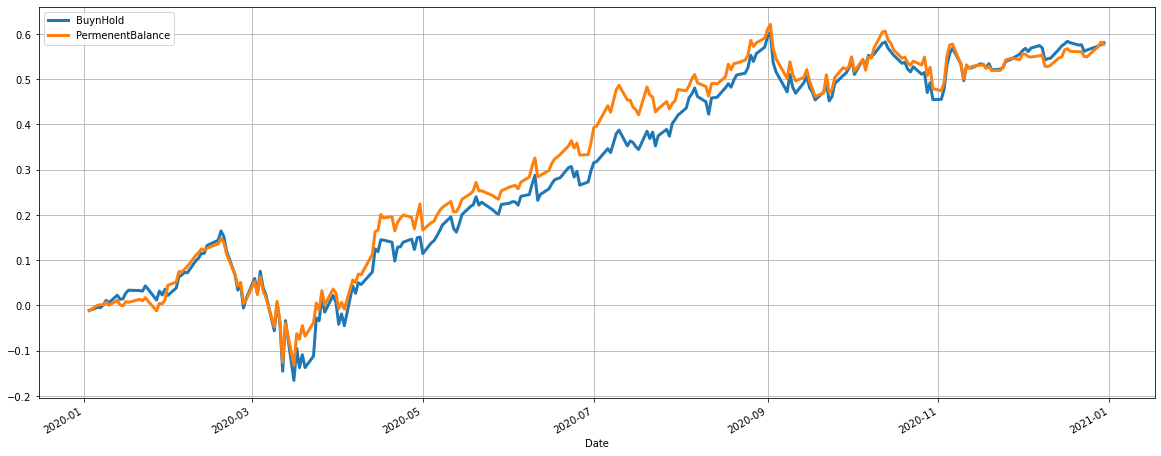

In [20]:
start, end = dt.date(2020,1,1), dt.date(2020,12,31)
data = yahoo.download(stocks,start,end)['Adj Close'].fillna(method="ffill")

nominal = (initial_capital * weights) // data.iloc[0,:].values
investment = pd.DataFrame((data * nominal).T.sum(),columns=['BuynHold'],index = data.index)
investment['PermenentBalance'] = (data * cvarport.weights.values).T.sum()
investment.pct_change().cumsum().plot(figsize=(20,8),grid=True,lw=3.0)
investment.pct_change().sum()

# Cartera Rabalanceo 66,72% (1646 / 987) 
# Cartera Balance Constante 57,68%
# Cartera Buy-&-Hold 58,06%

In [36]:
nominal

array([ 617.,  327., 2927.,   74.,  129.,  307.,  569.,  301.,  728.,
        316.])